In [2]:
## REQUIRED LIBRARIES

# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data frame and show the shape of the data
data_file = '../data/raw/bank_full.csv'
df = pd.read_csv(data_file, delimiter=';')
df.shape

(41188, 21)

In [4]:
# Check variable data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
# Check data for missing elements
# df.isnull().sum()

In [6]:
# Get unique count for each attribute
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [7]:
# Review the top rows of what is left of the data frame
df.head(200).tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
190,41,technician,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
191,38,blue-collar,single,basic.9y,no,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
192,45,management,divorced,university.degree,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
193,42,technician,married,university.degree,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
194,34,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
195,48,blue-collar,married,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
196,37,admin.,married,high.school,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
197,34,blue-collar,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
198,40,admin.,married,basic.9y,unknown,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
199,43,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


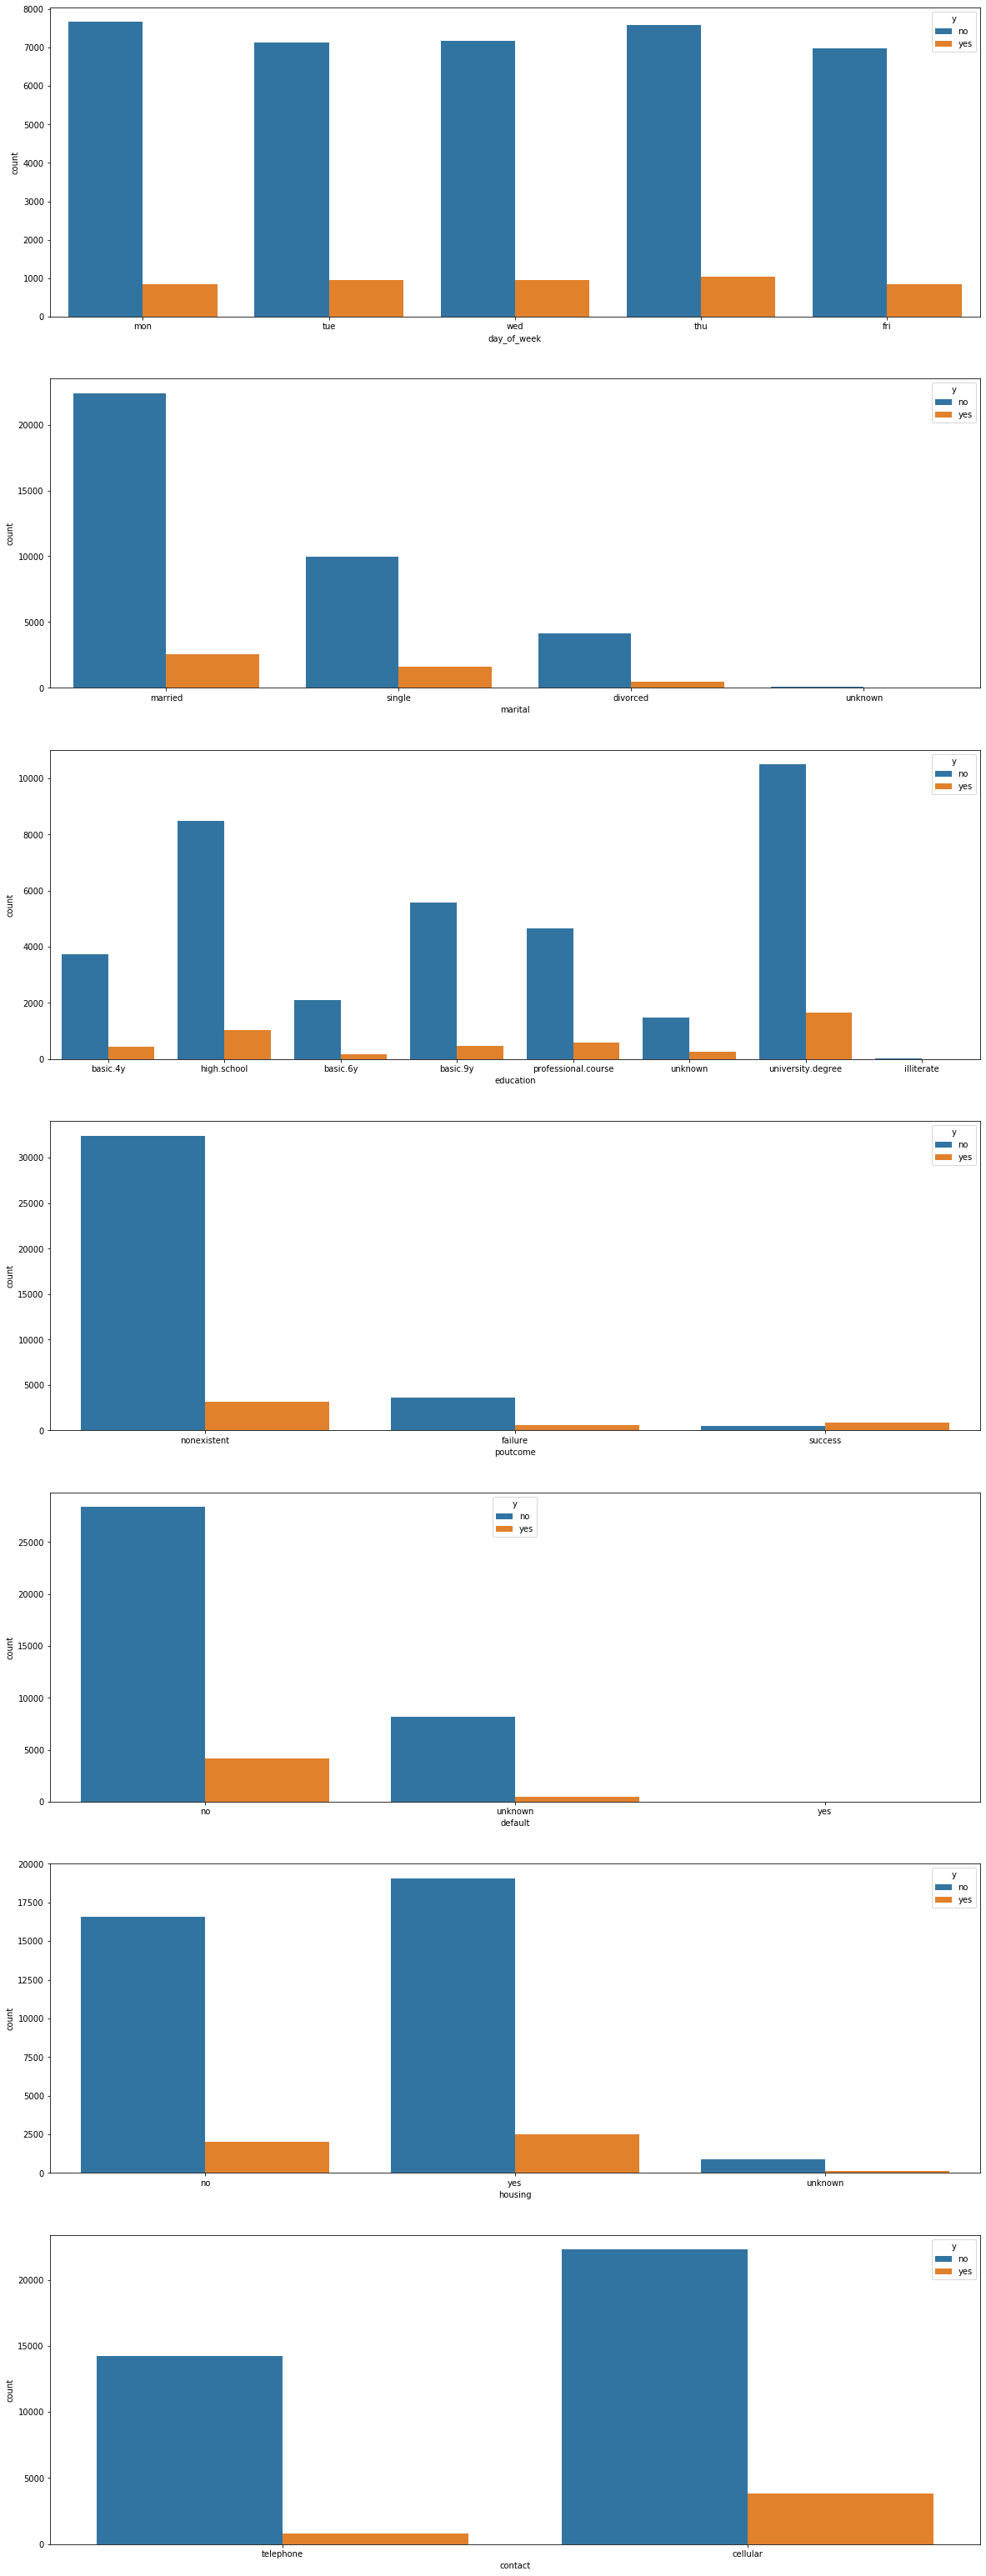

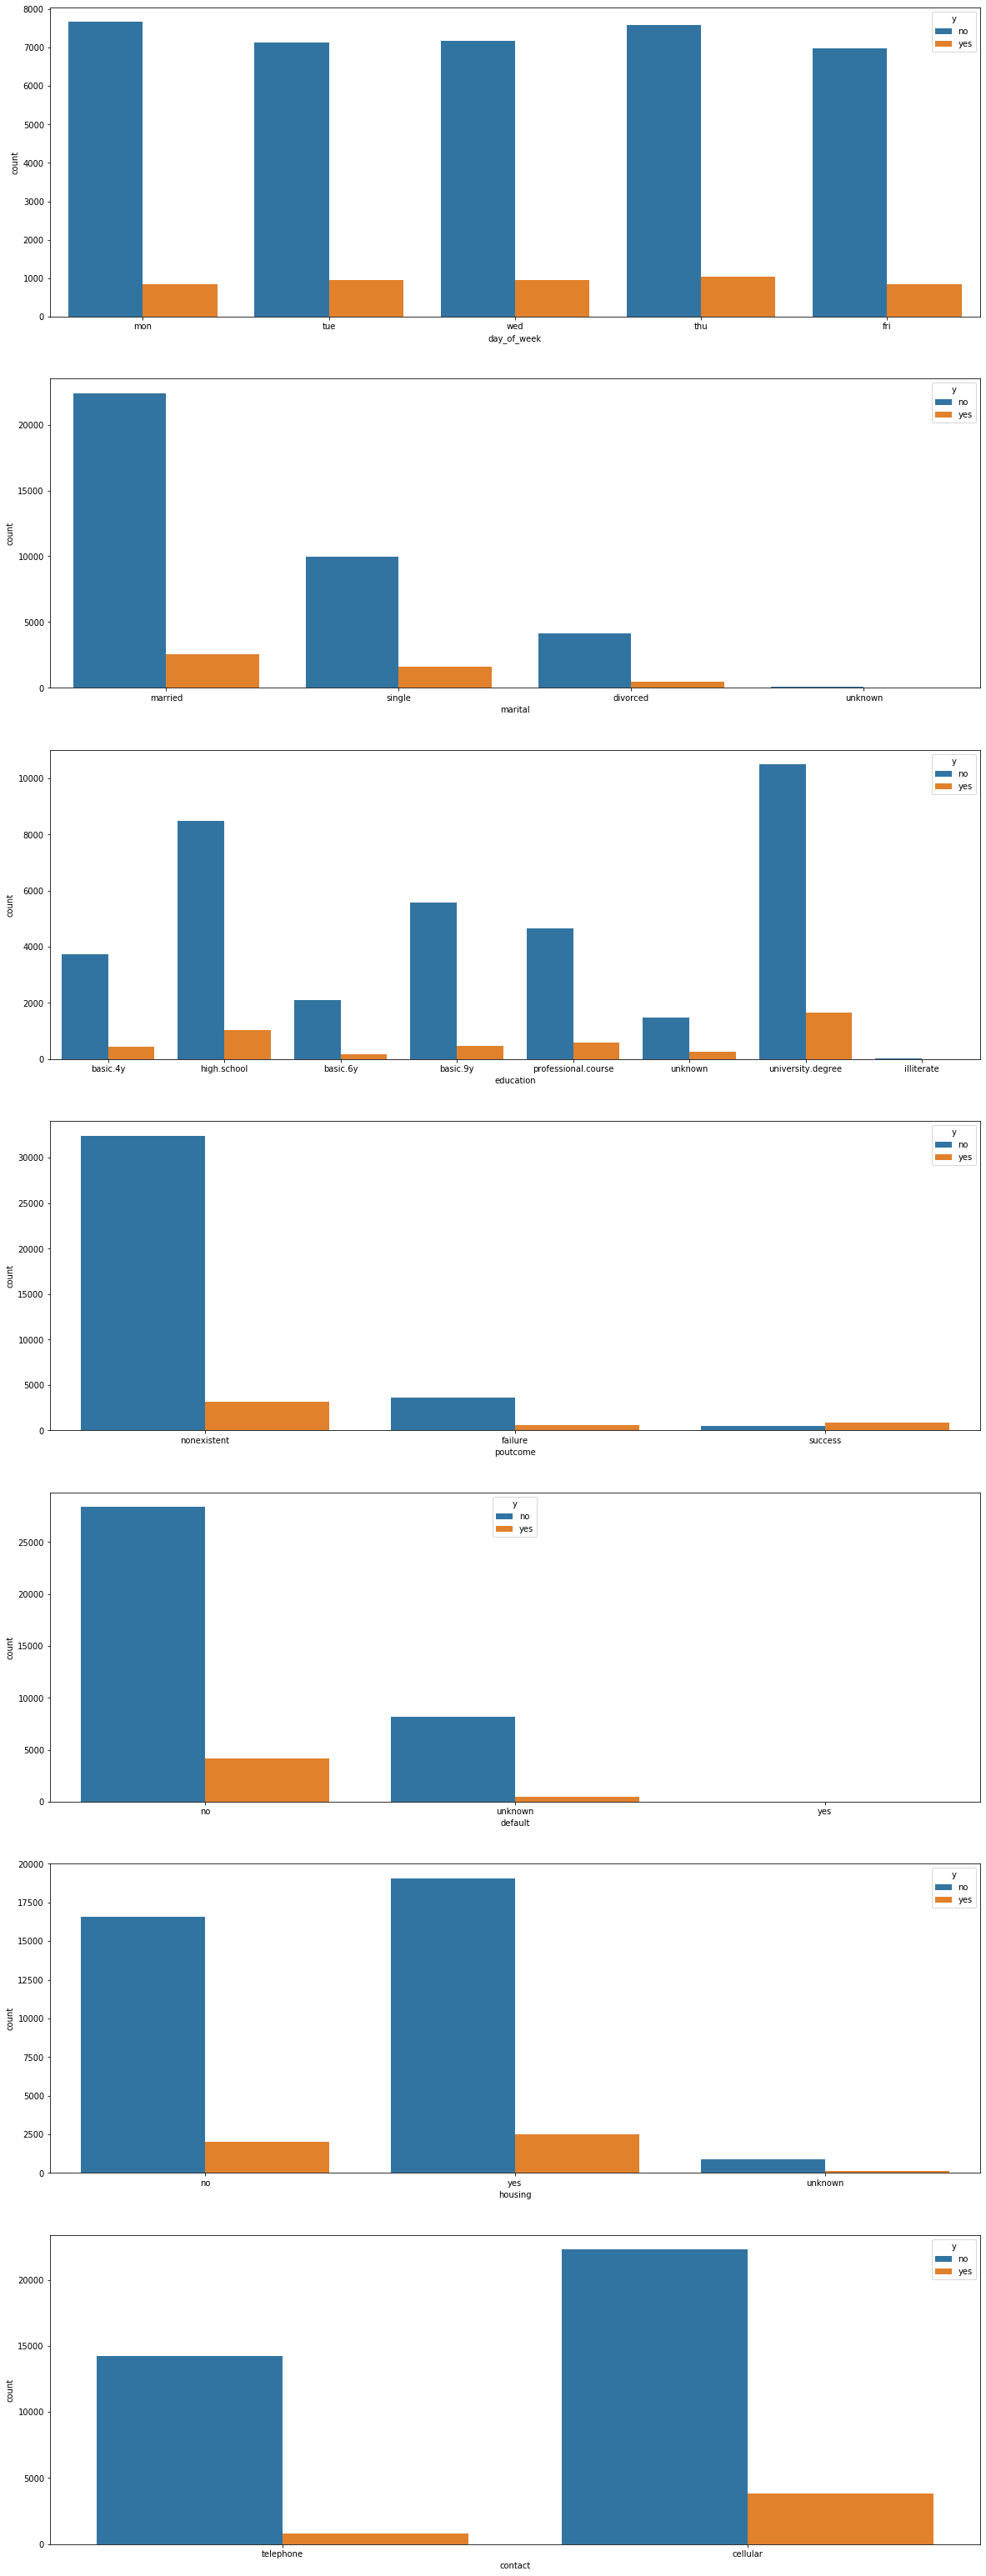

In [8]:
# Plot some histograms
col = ['day_of_week', 'marital', 'education', 'poutcome', 'default', 'housing', 'contact']
ncol = len(col)
fig, axarr = plt.subplots(ncol, figsize=(20, 8*ncol))
for i in range(ncol):
    sns.countplot(x=col[i], hue='y', data = df, ax=axarr[i])
fig

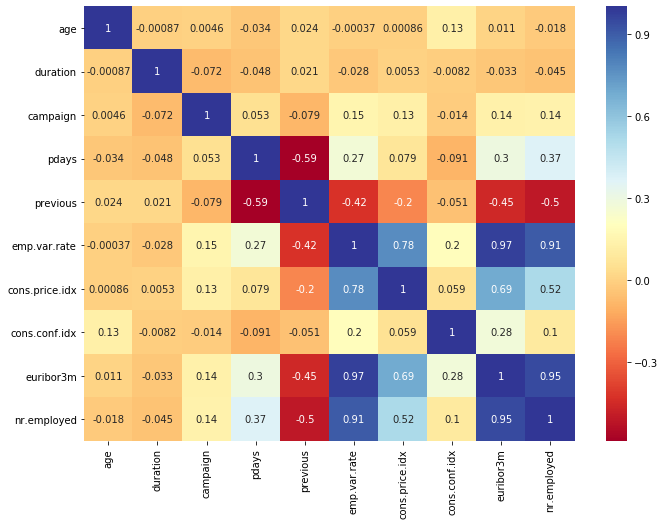

In [9]:
# Plot the heatmap
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

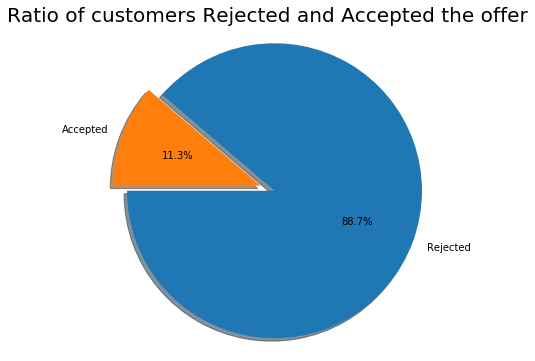

In [12]:
# Plot the ratio of accepted and rejected customers
labels = 'Rejected','Accepted'
sizes = [df.y[df['y']=='no'].count(), df.y[df['y']=='yes'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Ratio of customers Rejected and Accepted the offer", size = 20)
plt.show()